# What are Embeddings?

### Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
word_embeddings ={
    "cat": [0.8,0.6],
    "dog": [0.7,0.9],
    "fish": [0.1,0.2], 
    "car": [-0.5,0.2],
    "bus": [0.85,0.15], 
    "train": [0.88,0.12],
    "truck": [0.9,0.2],
    "puppy": [0.75,0.85]
}

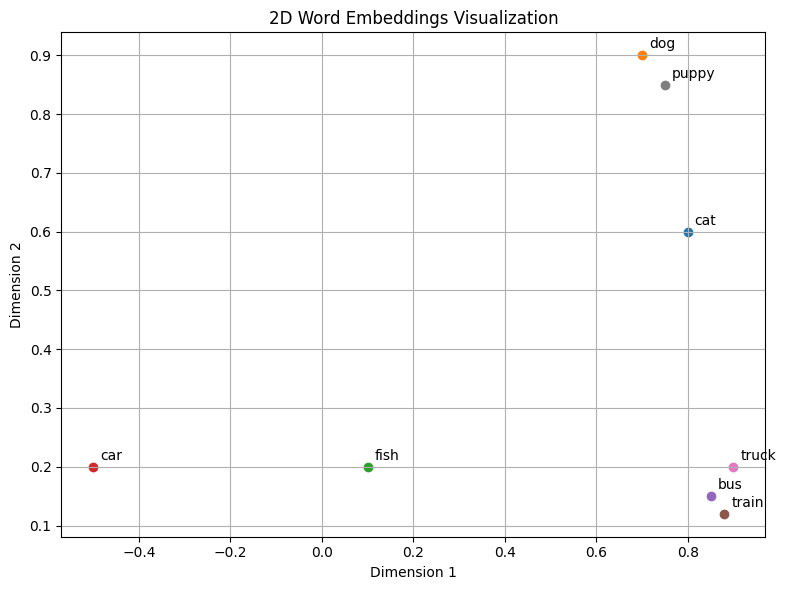

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1])
    # ax.text(coords[0] + 0.01, coords[1] + 0.01, word, fontsize=12)
    ax.annotate(word, (coords[0], coords[1]), textcoords="offset points", xytext=(5,5))
    
ax.set_title("2D Word Embeddings Visualization")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")    
ax.grid(True)

plt.tight_layout()
plt.show()
    

# Measuring Similarity

In [4]:
def cosine_similarity(vec1, vec2):
    """
    Cosine similarity between two vectors.
    - Results range from -1 (opposite) to 1 (identical).
    - Results close to 0: Not related.
    - Result close to -1: Opposite meaning."""
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    return dot_product / (norm_vec1 * norm_vec2)

In [5]:
cat_vectot = [0.8,0.6,0.3]
kitten_vector = [0.75,0.85,0.25]
car_vector = [-0.5,0.2,0.1]

cat_kitten_similarity = cosine_similarity(cat_vectot, kitten_vector)
print(f"Cosine Similarity between 'cat' and 'kitten': {cat_kitten_similarity:.4f}")

Cosine Similarity between 'cat' and 'kitten': 0.9778


In [7]:
cosine_similarity_car_cat = cosine_similarity(car_vector, cat_vectot)
print(f"Cosine Similarity between 'car' and 'cat': {cosine_similarity_car_cat:.4f}")

Cosine Similarity between 'car' and 'cat': -0.4372


# Creating First Embeddings

In [10]:
from langchain_huggingface import HuggingFaceEmbeddings
##Initialize a simple embeddings model (no API key needed!)
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
embeddings

d:\Udemy_learning\Ultimate_RAG_learning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Udemy_learning\Ultimate_RAG_learning\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\mdshe\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an adm

HuggingFaceEmbeddings(model_name='all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [12]:
## create your first embeddings
text = "Hello, I am learning embeddings!"
vector = embeddings.embed_query(text)
print(f"text: {text}")
print(f"Embedding length: {len(vector)}")
print(f"Embedding vector for the text: {vector}")

text: Hello, I am learning embeddings!
Embedding length: 384
Embedding vector for the text: [-0.0192155409604311, -0.11271484941244125, 0.043318867683410645, -0.023986369371414185, -0.004346090834587812, 0.05861456319689751, 0.0066609568893909454, -0.005659535992890596, 0.013879960402846336, -0.020150702446699142, 0.019228603690862656, 0.06252457201480865, 0.04317547753453255, 0.03409276530146599, -0.07060712575912476, -0.0026158997789025307, 0.043484486639499664, 0.08004212379455566, -0.06350620090961456, 0.0057429480366408825, -0.03788573667407036, -0.04129955545067787, 0.05842912942171097, -0.07184741646051407, 0.038618553429841995, -0.015549791045486927, -0.02941533923149109, 0.05976324900984764, 0.09614498913288116, -0.1030707135796547, 0.054771579802036285, -0.025493726134300232, -0.030421020463109016, 0.07976515591144562, -0.03675923869013786, 0.10385878384113312, 0.018566373735666275, -0.012162855826318264, -0.04077879711985588, 0.010853085666894913, 0.008978236466646194, 0.049

In [15]:
sentences=[
    "The cat sat on the mat.",
    "A dog barked loudly.",
    "The fish swims in the pond.",
    "Cars are fast vehicles.",
    "Buses carry many passengers.",
    "Trains run on tracks.",
    "A puppy is a young dog.",
    ]

embedding_sentences = embeddings.embed_documents(sentences)
print(f"Number of embedded sentences: {len(embedded_sentences)}")
print(embedding_sentences[0])
print(embedding_sentences[1])

Number of embedded sentences: 7
[0.13023719191551208, -0.015772810205817223, -0.03671669960021973, 0.057986412197351456, -0.059791747480630875, 0.03305370733141899, 0.03012402169406414, 0.028927192091941833, -0.018605245277285576, 0.05529656633734703, -0.02815472148358822, 0.0697595551609993, 0.039665814489126205, 0.025935178622603416, -0.05514025688171387, -0.052253130823373795, -0.05344408378005028, -0.03668159618973732, 0.06081567704677582, 0.03706861659884453, -0.030381781980395317, -0.013053405098617077, 0.030966416001319885, -0.06174452230334282, -0.05179910734295845, 0.07619389146566391, -0.029811808839440346, -0.052309468388557434, 0.04248228669166565, -0.006359002087265253, -0.06626338511705399, 0.0022614961490035057, -0.02634851634502411, 0.055925264954566956, 0.017410624772310257, -0.0916764885187149, 0.014392519369721413, -0.07222936302423477, 0.043794043362140656, 0.020901737734675407, 0.08719959855079651, -0.0032805083319544792, -0.009001706726849079, -0.05653810128569603